# Finding the MRI Brain Tumor Detection dataset

Let's find the dataset in this linK: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# Import Packages

In [45]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob # allows you to go through directories
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2 #used to read the image

## Reading the images

In [46]:
tumor = [] #images of brains with tumors
path = "./data/brain_tumor_dataset/yes/*.jpg" #in the brain_tumor_dataset/yes directory, select all the files with the jpg extension

#iterate through the directory with a for loop
for f in glob.iglob(path): #iterating all paths of all the files in the target directory
    img = cv2.imread(f)
    #fix the dimensions
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img) #split image into different single channeled images
    img = cv2.merge([r,g,b]) #merging the different single channel images into one multichannel image, with the order in the conventional way
    tumor.append(img) #add the image to the tumor list
    

In [47]:
healthy = [] #images of brains without tumors
path = "./data/brain_tumor_dataset/no/*.jpg" #in the brain_tumor_dataset/yes directory, select all the files with the jpg extension

#iterate through the directory with a for loop
for f in glob.iglob(path): #iterating all paths of all the files in the target directory
    img = cv2.imread(f)
    #fix the dimensions
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img) #split image into different single channeled images
    img = cv2.merge([r,g,b]) #merging the different single channel images into one multichannel image, with the order in the conventional way
    healthy.append(img) #add the image to the healthy list
    

In [48]:
healthy = np.array(healthy) #convert healthy and tumor lists to numpy arrays
tumor = np.array(tumor)
All = np.concatenate((healthy, tumor))

In [49]:
np.random.choice(10,5, replace=False) #from arange of 0-5, size must be 3, no duplication

array([1, 6, 0, 8, 5])

## Visualising the Brain MRI Images

In [50]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0],num, replace=False)] #this generates an array like [8, 6, 5, 9, 1]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0],num, replace=False)] #this generates an array like [8, 6, 5, 9, 1]  
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1) #1 row, 5 columns, putting it in its corresponding subplot, but subplots are 1 indexed in matplotlib
        plt.title("Healthy")
        plt.imshow(healthy_imgs[i])#place the image in that subplot
        
    plt.figure(figsize=(20,10))
    for i in range(num):
        plt.subplot(1, num, i+1) #1 row, 5 columns, putting it in its corresponding subplot, but subplots are 1 indexed in matplotlib
        plt.title("Tumor")
        plt.imshow(tumor_imgs[i])#place the image in that subplot
        

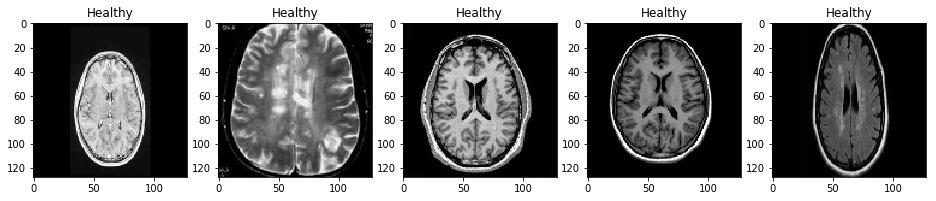

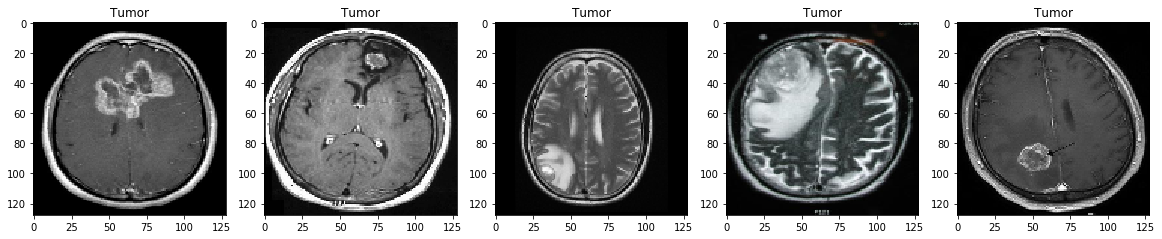

In [56]:
plot_random(healthy,tumor, num=5)

## What is Pytorch's Abstract Dataset Class


In [52]:
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other): #use d1+d2
        return ConcatDataset([self, other]) 

In [53]:
class MRI(Dataset):
    def __init__(self, scores): #constructor, first arg is always self (this)
        self.x = scores
    #override the __getitem__ function
    def __getitem__(self,index): #use d[i]
        return self.x[index] #return the element at index "index" in instance variable x
    def __len__(self): #use len(d)
        return len(self.x)

In [54]:
s1 = [1,2,3,4]
d1 = MRI(s1)

s2 = [5,4,3,2]
d2 = MRI(s2)

In [55]:
d = d1 + d2

In [59]:
d[5]

4

## Creating a Customized MRI Dataset Class

In [78]:
class MRI(Dataset):
    def __init__(self):
        
        tumor = []
        healthy = []
        # cv2 - It reads in BGR format by default
        for f in glob.iglob("./data/brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) # I can add this later in the boot-camp for more adventure
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # otherwise the shape will be (h,w,#channels)
            tumor.append(img)

        for f in glob.iglob("./data/brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) #putting color channel first
            healthy.append(img)

        # our images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)
        
        # our labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        
        # Concatenates
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))
        
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self, index):
        
        sample = {'image': self.images[index] , 'label':self.labels[index]}
        
        return sample
    
    def normalize(self):
        self.images = self.images/255.0

In [85]:
mri = MRI()

In [86]:
mri.normalize()

In [87]:
len(mri)

245

In [88]:
img = mri[5]["image"]

In [89]:
img

array([[[0.08627451, 0.08627451, 0.08627451, ..., 0.07843138,
         0.08235294, 0.08235294],
        [0.08235294, 0.07450981, 0.07450981, ..., 0.08627451,
         0.08627451, 0.09411765],
        [0.09411765, 0.09411765, 0.08235294, ..., 0.07058824,
         0.07058824, 0.07058824],
        ...,
        [0.5529412 , 0.5529412 , 0.5254902 , ..., 0.12941177,
         0.12941177, 0.12941177],
        [0.09411765, 0.09411765, 0.09411765, ..., 0.47843137,
         0.4627451 , 0.4627451 ],
        [0.4627451 , 0.5019608 , 0.5019608 , ..., 0.5019608 ,
         0.5019608 , 0.5058824 ]],

       [[0.5058824 , 0.5058824 , 0.5137255 , ..., 0.13725491,
         0.13725491, 0.13725491],
        [0.09411765, 0.09411765, 0.09411765, ..., 0.48235294,
         0.5254902 , 0.5254902 ],
        [0.5254902 , 0.5568628 , 0.5568628 , ..., 0.5137255 ,
         0.5137255 , 0.5254902 ],
        ...,
        [0.52156866, 0.5372549 , 0.5372549 , ..., 0.63529414,
         0.63529414, 0.5764706 ],
        [0.5

In [91]:
np.max(img)

1.0